# **Genetic Algorithm and Its Applications**

In [222]:
# Question 1: A

## Assignment 1

In [254]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)  # please do not remove this line
%matplotlib inline

In [225]:
def load_data_from_file(filename="advertising.csv"):
    data = np.genfromtxt(filename, dtype=None, delimiter=",", skip_header=1)
    features_x = data[:, :3]
    sales_y = data[:, 3]
    n = len(features_x)

    features_x = np.c_[np.ones((n, 1)), features_x]

    return features_x, sales_y

In [226]:
# Question 2: A
# Question 3: B
features_x, sales_y = load_data_from_file()
print(features_x[:5, :])
print(sales_y.shape)

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]
(200,)


## Assignment 2

In [231]:
def generate_random_value(bound=10):
    return (random.random() - 0.5)*bound

In [232]:
def create_individual(n=4, bound=10):
    individual = [generate_random_value(bound) for _ in range(n)]
    return individual

In [233]:
individual = create_individual()
print(individual)

[0.1127472136860852, -0.9506586254958571, 2.837985890347726, -1.9668727392107255]


## Assignment 3

In [234]:
def compute_loss(features_x, sales_y, individual):
    theta = np.array(individual)
    y_hat = features_x.dot(theta)
    loss = np.multiply((y_hat - sales_y), (y_hat - sales_y)).mean()
    return loss

def compute_fitness(features_x, sales_y, individual):
    loss = compute_loss(features_x, sales_y, individual)
    fitness = 1 / (1 + loss)
    return fitness

In [235]:
# Question 4: C
features_X, _ = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(features_x, sales_y, individual)
print(fitness_score)

1.0185991537088997e-06


## Assignment 4

In [236]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]
    return individual1_new, individual2_new

In [237]:
# Qyestion 5: D
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
individual1_new, individual2_new = crossover(individual1, individual2, 2.0)
print(individual1_new)
print(individual2_new)

[3.44, 2.57, -0.79, -2.41]
[4.09, 4.82, 3.1, 4.02]


## Assignment 5

In [238]:
def mutate(individual, mutation_rate=0.05):
    individual_new = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_new[i] = generate_random_value()

    return individual_new

In [239]:
# Question 6: A
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(before_individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


## Assignment 6

In [240]:
def initialize_population(m) :
    population = [create_individual() for _ in range(m)]
    return population

## Assignment 7

In [241]:
def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m - 1)

    while True:
        index2 = random.randint(0, m - 1)
        if index2 != index1:
            break

    if index2 > index1:
        return sorted_old_population[index2]
    else:
        return sorted_old_population[index1]

In [242]:
population = initialize_population(m=10)
individual_s = selection(population, m=10)
print(individual_s)

[-4.195541814474646, -1.7994539532745424, 0.07940642520573915, 4.3283382422690675]


## Assignment 8

In [243]:
def create_new_population(features_x, sales_y, old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=lambda individual: compute_fitness(features_x, sales_y, individual))

    if gen % 1 == 0:
        print("Best loss: ", compute_loss(features_x, sales_y, sorted_population[m-1]), "with chromosome: ", sorted_population[m-1])

    new_population = []

    while len(new_population) < m - elitism:
        # Selection
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)

        # Crossover
        child1, child2 = crossover(individual1, individual2)

        # Mutation
        child1 = mutate(child1)
        child2 = mutate(child2)

        new_population.append(child1)
        new_population.append(child2)

    # Elitism
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())

    return new_population, compute_loss(features_x, sales_y, sorted_population[m-1])


In [244]:
# Quetsion 7: A
features_x, sales_y = load_data_from_file()
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(features_x, sales_y, old_population, elitism=2 , gen=1)


Best loss:  123415.051528805 with chromosome:  [3.44, 2.57, -0.79, -2.41]


## Assignment 9

In [245]:
def initialize_population ( m ) :
    population = [create_individual() for _ in range(m)]
    return population

In [246]:
def run_ga():
    n_generations = 100
    m = 600
    features_x, sales_y = load_data_from_file()
    population = initialize_population(m)
    losses_list = []
    for i in range(n_generations):
        population, best_loss = create_new_population(features_x, sales_y, population, elitism=2, gen=i)
        losses_list.append(best_loss)

    return losses_list

## Assignment 10

In [247]:
def visualize_loss(losses_list):
    plt.plot(losses_list, color="blue")
    plt.xlabel("Generations")
    plt.ylabel("losses")
    plt.show()

Best loss:  384.1538432166617 with chromosome:  [1.1670018318051756, 0.1624794871665125, 0.7545527807326102, -0.8413878671724684]
Best loss:  258.5244528553904 with chromosome:  [1.6084927975444896, -0.05301059713686884, 0.7398180308237656, -0.1908491145052882]
Best loss:  258.5244528553904 with chromosome:  [1.6084927975444896, -0.05301059713686884, 0.7398180308237656, -0.1908491145052882]
Best loss:  258.5244528553904 with chromosome:  [1.6084927975444896, -0.05301059713686884, 0.7398180308237656, -0.1908491145052882]
Best loss:  258.5244528553904 with chromosome:  [1.6084927975444896, -0.05301059713686884, 0.7398180308237656, -0.1908491145052882]
Best loss:  68.19592286710187 with chromosome:  [-3.141641313430638, 0.14371351654905884, 0.0965701893169657, -0.10374133315594558]
Best loss:  68.19592286710187 with chromosome:  [-3.141641313430638, 0.14371351654905884, 0.0965701893169657, -0.10374133315594558]
Best loss:  65.58164818589347 with chromosome:  [-4.012218135495534, 0.1437135

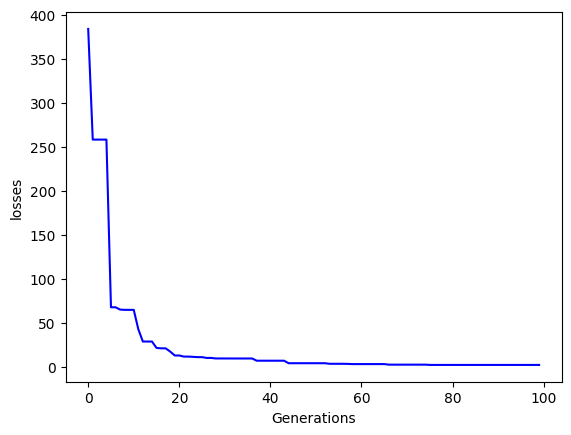

In [248]:
losses_list = run_ga()
visualize_loss(losses_list)

## Assigment 11

In [249]:
features_x, sales_y = load_data_from_file()
population = initialize_population(m=100)

In [250]:
def visualize_predict_gt(features_x, sales_y, population):
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=lambda individual: compute_fitness(features_x, sales_y, individual))
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        estimated_price = sum(c*x for x, c in zip(feature, theta))
        estimated_prices.append(estimated_price)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

[-2.7489899945186345, 0.44770791007147204, -1.981823878243627, 1.1988020488215845]


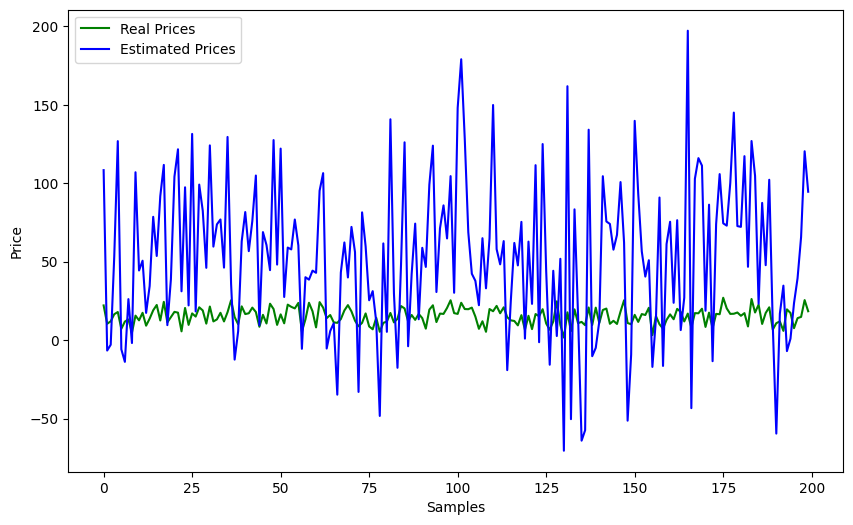

In [252]:
visualize_predict_gt(features_x=features_X, sales_y=sales_y, population=population)